## DATA 601 Project-2
Due date: December 19, 2021. 23:59 pm.<br>


For your second project, you will be working on the flights dataset. <br>
You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
<br>
<b> FILES </b>
* flights2DCMDVA.xlsx (Note that this is a smaller version of the original NYCflights13.csv data) <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY hourly weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 )<br>



We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EAD, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

Answer following questions <br>

    1.1 Calculate the total number of seats for all the planned flights for each destination separately?
    1.2 What was the day of the year with the highest number of flights?
    1.3 What was the day of the year with the highest number of seats?    
    
    2.1 What day of the year most cancellations happened? 
    2.2 Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with some numbers.
    2.3 Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with some numbers.
    2.4 What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?
    2.5 Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)
    
    For the next group of questions, do not include the cancelled flights.
    3.1 Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.
    3.2 Is there a correlation between the weather datasets and daily average arrival delay?
    3.3 Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?
    3.4 Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)
    3.5 Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) 
    3.6 What day of the week we had the highest average delay?
    3.7 Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?
    3.8 Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. 
 
    Download the "fligts_test_data.xlsx" dataset from https://github.com/simsekergun/DATA601/tree/main/2021Fall/Projects/Project2
    4. Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy.
    
   

*************************************************************

In [2]:
# Usual Suspects
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
import seaborn as sns
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# SM stuff
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Making the dataframes

In [3]:
df_airlines = pd.read_csv('airlines.csv',index_col=0 )
df_airlines.head(2)


,name
carrier,
9E,Endeavor Air Inc.
AA,American Airlines Inc.


In [4]:
df_airports = pd.read_csv('airports.csv' )
df_airports.head(2)

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago


In [5]:
df_planes = pd.read_csv('planes.csv' ,index_col=0)
#df_planes = df_planes[df_planes['year'] == 2013.0]
df_planes.head(2)

,year,type,manufacturer,model,engines,seats,speed,engine
tailnum,,,,,,,,
N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan


In [6]:
df_wthNYhr = pd.read_csv('weatherNYhourly.csv',index_col=[0] )
df_wthNYhr.head(2)

,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
origin,,,,,,,,,,,,,,
EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z


In [13]:
df_FedHol_2013 = pd.read_excel('federal-holidays-2013.xlsx',skiprows=1,names=['date', 'Fed_hol', 'day_of_week'])
df_FedHol_2013.head(2)

,date,Fed_hol,day_of_week
0,"January 1, 2013",New Year's Day,Tuesday
1,"January 21, 2013",Martin Luther King Day,Monday


In [8]:
df_flights2DCMDVA = pd.read_excel('flights2DCMDVA.xlsx',index_col=0)
df_flights2DCMDVA.head(2)

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
year,,,,,,,,,,,,,,,
2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0
2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0


In [9]:
df_wthMDdaily = pd.read_excel('weatherMDdaily.xlsx',index_col=[0])
df_wthMDdaily.head(2)

,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
Date,,,,,
2013-01-01,44,34,0,0,0
2013-01-02,37,26,0,0,0


In [10]:
df_wthNYdaily = pd.read_excel('weatherNYdaily.xlsx')
df_wthNYdaily.head(2)

,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,41,27,0,0,0
1,2013-01-02,35,23,0,0,0


In [39]:
df_flights_test_data = pd.read_excel('flights_test_data.xlsx')
df_flights_test_data.head(2)

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,MQ,JFK,DCA,213
1,2013,1,25,EV,LGA,IAD,229


*******************************************************************************************************************

## 1

## 1.1 Calculate the total number of seats for all the planned flights for each destination separately?

In [14]:
## Merging dataframes df_flights2DCMDVA and df_planes
df = df_flights2DCMDVA.merge(df_planes, on='tailnum')
df.head(2)

,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,...,hour,minute,year,type,manufacturer,model,engines,seats,speed,engine
0,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,...,6.0,29.0,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan
1,2,26,1756.0,-4.0,1926.0,11.0,WN,N273WN,475,EWR,...,17.0,56.0,2007.0,Fixed wing multi engine,BOEING,737-7H4,2,140,NaN,Turbo-fan


In [15]:
## Finding total number of seats
total_seats = df.groupby(['origin', 'dest']).aggregate(Total_seats=('seats','sum'))
total_seats

Total_seats
origin dest             
EWR    BWI         46459
       DCA         94793
       IAD         67854
JFK    BWI         47540
       DCA         96462
       IAD        121530
LGA    BWI          2136
       DCA        714970
       IAD        106620

## 1.2 What was the day of the year with the highest number of flights?

In [18]:
## Converting year , month, day to date and making new column for date
date=pd.to_datetime(df[['year','month', 'day']])
df['df_Date']=date

## Converting date to day_of_year
df['DOY'] = df['df_Date'].dt.dayofyear

## Day of year with highest number of Flights
Maxflight_day=df.groupby(['DOY']).aggregate(Total_flights=('flight','count'))
Maxflight_day.sort_values(by='Total_flights',ascending=False).head(5)

,Total_flights
DOY,
86.0,56
10.0,55
73.0,55
38.0,54
17.0,54


## 1.3 What was the day of the year with the highest number of seats?

In [20]:
## Day of the year with highest number of seats 

Max_seats = df.groupby(['DOY']).aggregate(Tot_aval_seats=('seats','sum'))
Max_seats.sort_values(by='Tot_aval_seats',ascending=False).head(1)

,Tot_aval_seats
DOY,
268.0,5911


## 2

## 2.1 What day of the year most cancellations happened?

In [21]:
# Change all Nan values for arrival time to integer -9999
df['arr_time']=df['arr_time'].fillna(-9999)

## Creating new dataframe with cancelled flights
df_cancelled_flights = df[df['arr_time'] == -9999]

## Counting day of the year for most cancelled flights
daily_total_cancel=df_cancelled_flights.groupby(['DOY']).aggregate(no_of_times_flight_cancelled=('arr_time','value_counts'))
daily_total_cancel.sort_values(by='no_of_times_flight_cancelled',ascending=False)

#df_cancelled_flights

,,no_of_times_flight_cancelled
DOY,arr_time,
65.0,-9999.0,21
39.0,-9999.0,18
67.0,-9999.0,11
143.0,-9999.0,11
255.0,-9999.0,10
...,...,...
209.0,-9999.0,1
74.0,-9999.0,1
205.0,-9999.0,1


## 2.2 Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with some numbers.

In [22]:
## preparing the weather dataset for merging

## Converting all the T inputs in the precipitation columns with Nan
df_wthNYdaily["Precipitation"] = pd.to_numeric(df_wthNYdaily["Precipitation"], errors='coerce')
## Filling the T (now converted Nans') with 1
df_wthNYdaily["Precipitation"]=df_wthNYdaily["Precipitation"].fillna(1)
## Converting all the T inputs in the precipitation columns with Nan
df_wthNYdaily["Snowfall"] = pd.to_numeric(df_wthNYdaily["Snowfall"], errors='coerce')
## Filling the T (now converted Nans') with 1
df_wthNYdaily["Snowfall"] = df_wthNYdaily["Snowfall"].fillna(1)
## Creating DOY column from date
df_wthNYdaily['DOY'] = df_wthNYdaily['Date'].dt.dayofyear


## Merging wegther data and cancelled_flights datasets
df_wthr_can_flt = df_cancelled_flights.merge(df_wthNYdaily, on='DOY')

## Finding relation between weather and cancellation
daily_total_cancel=df_wthr_can_flt.groupby(['DOY','Precipitation','Snowfall']).aggregate(no_of_times_flight_cancelled=('arr_time','value_counts'))
daily_total_cancel.sort_values(by='no_of_times_flight_cancelled',ascending=False)

,,,,no_of_times_flight_cancelled
DOY,Precipitation,Snowfall,arr_time,
65.0,1.00,1.0,-9999.0,21
39.0,0.78,2.9,-9999.0,18
67.0,0.27,3.0,-9999.0,11
143.0,0.03,0.0,-9999.0,11
255.0,0.29,0.0,-9999.0,10
...,...,...,...,...
209.0,0.07,0.0,-9999.0,1
74.0,0.00,0.0,-9999.0,1
205.0,0.00,0.0,-9999.0,1


##  2.3 Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with some numbers.

In [24]:
## introducing necessary columns in the Federal Holiday dataframe from existing columns

## Changing date format and adding new columns
dat=pd.to_datetime(pd.Series(["January 1, 2013","January 21, 2013","February 18, 2013","May 27, 2013","July 4, 2013","September 2, 2013","October 14, 2013","November 11, 2013","November 28, 2013","December 25, 2013", None])).to_list()
df_FedHol_2013['dt']=dat
df_FedHol_2013

## Making individual columns
df_FedHol_2013['day'] = df_FedHol_2013['dt'].dt.day
df_FedHol_2013['month'] = df_FedHol_2013['dt'].dt.month
df_FedHol_2013['year'] = df_FedHol_2013['dt'].dt.year
df_FedHol_2013


## Chosing the columns and rows needed
Fed_hol=df_FedHol_2013.iloc[ :10, 1: ]


## Converting date in Federal Holidays to day_of_year
Fed_hol['DOY'] = Fed_hol['dt'].dt.dayofyear

Fed_hol

,Fed_hol,day_of_week,dt,day,month,year,DOY
0,New Year's Day,Tuesday,2013-01-01,1.0,1.0,2013.0,1
1,Martin Luther King Day,Monday,2013-01-21,21.0,1.0,2013.0,21
2,Presidents' Day,Monday,2013-02-18,18.0,2.0,2013.0,49
3,Memorial Day,Monday,2013-05-27,27.0,5.0,2013.0,147
4,Independence Day,Thursday,2013-07-04,4.0,7.0,2013.0,185
5,Labor Day,Monday,2013-09-02,2.0,9.0,2013.0,245
6,Columbus Day,Monday,2013-10-14,14.0,10.0,2013.0,287
7,Veterans Day,Monday,2013-11-11,11.0,11.0,2013.0,315
8,Thanksgiving Day,Thursday,2013-11-28,28.0,11.0,2013.0,332
9,Christmas Day,Wednesday,2013-12-25,25.0,12.0,2013.0,359


In [25]:
## Creating new dataframe with cancelled flights
df_cancelled_flights = df[df['arr_time'] == -9999]

## Merging dataframe Fed_hol with dataframe df on day
df_with_fed_hol = df_cancelled_flights.merge(Fed_hol, on='DOY')
#df_with_fed_hol.head(2)

## Determining relationship between Federal holidays and flight cancellation
daily_total_cancel=df_with_fed_hol.groupby(['DOY','Fed_hol']).aggregate(no_of_times_flight_cancelled=('arr_time','value_counts'))
daily_total_cancel.sort_values(by='no_of_times_flight_cancelled',ascending=False).head(10)

,,,no_of_times_flight_cancelled
DOY,Fed_hol,arr_time,
245.0,Labor Day,-9999.0,2
315.0,Veterans Day,-9999.0,1


## 2.4 What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?

In [26]:
## Creating new dataframe with cancelled flights
df_cancelled_flights = df[df['arr_time'] == -9999]

## calcualting total seat cancelled
tot_cancelled_seats=df_cancelled_flights['seats'].sum()
print('Total cancelled seats',tot_cancelled_seats)

## Total moneytary loss with $50 /seat
print('Total loss $', 50*tot_cancelled_seats)

Total cancelled seats 27690
Total loss $ 1384500


## 2.5 Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)[link text](https:// [link text](https://))

In [27]:
## Finding total cancelled flights per carrier
Tot_cancelled_for_airline=df_cancelled_flights.groupby('carrier').arr_time.count()

## Making separate column for Total cancelled for particular carrier
df['sp_airline_cancelled_tot']=df.apply(lambda row: Tot_cancelled_for_airline.get(row['carrier']),axis=1)

# Finding total number of flights for a carrier
Carriers_total_flights=df.groupby('carrier').carrier.count()

## Making separate column for Total flights for particular carrier
df['sp_airline_tot_flights']=df.apply(lambda row: Carriers_total_flights.get(row['carrier']),axis=1)

## Making ratio column cancelled flights/planned flights for each airline company
df['ratio']=df.apply(lambda row: (row['sp_airline_cancelled_tot']/row['sp_airline_tot_flights']),axis=1 )

## sorting carriers most reliable first
New_df=df[['carrier','ratio']]
reliable=New_df.sort_values(by='ratio', ascending=True)
Reliable=reliable.groupby(['ratio'])
Reliable.first()

,carrier
ratio,
0.002901,US
0.004493,9E
0.011852,B6
0.033816,WN
0.062193,EV
0.106109,YV
0.178571,MQ


#### US Airways Inc. is the most reliable airlines

## 3

## For the next group of questions, do not include the cancelled flights.

## 3.1 Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.

In [29]:
## Removing cancelled flights from dataframe
df_New=df.drop(df.index[df['arr_time'] == -9999], inplace=False)

## Converting date in Federal Holidays to day_of_year
Fed_hol['DOY'] = Fed_hol['dt'].dt.dayofyear

##Daily avaerage delay
daily_avg_delay = df_New.groupby('DOY').arr_delay.mean()
daily_avg_delay.head(365)

DOY
1.0      11.151515
2.0      23.131579
3.0       7.238095
4.0       8.146341
5.0      -8.500000
           ...    
361.0     9.200000
362.0    -7.136364
363.0    15.333333
364.0     1.909091
365.0    11.538462
Name: arr_delay, Length: 365, dtype: float64

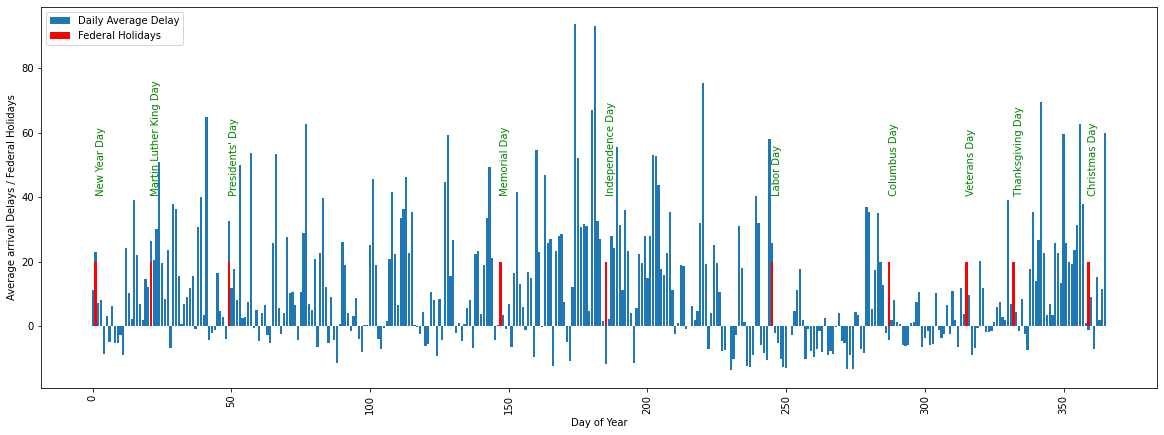

In [30]:
# Plot average delay for destination
plt.figure(figsize = (20, 7))

x=np.arange(366)
Federal_Holidays=Fed_hol['DOY'].values
y_Fed_hol=np.full(10,20)

plt.bar(x,daily_avg_delay.values, label='Daily Average Delay')
plt.bar(Federal_Holidays,y_Fed_hol,color='r', label='Federal Holidays')
plt.legend(loc=2)

plt.text(1,40, " New Year Day", color='g', rotation=90)
plt.text(21,40, " Martin Luther King Day", color='g', rotation=90)
plt.text(49,40, " Presidents' Day", color='g', rotation=90)
plt.text(147,40, " Memorial Day", color='g', rotation=90)
plt.text(185,40, " Independence Day", color='g', rotation=90)
plt.text(245,40, " Labor Day", color='g', rotation=90)
plt.text(287,40, " Columbus Day", color='g', rotation=90)
plt.text(315,40, " Veterans Day", color='g', rotation=90)
plt.text(332,40, " Thanksgiving Day", color='g', rotation=90)
plt.text(359,40, " Christmas Day", color='g', rotation=90)

# y-label-1
plt.ylabel('Average arrival Delays / Federal Holidays')

# x-label
plt.xlabel('Day of Year')

# x_ticks
plt.xticks(rotation = 90)

plt.show()

## 3.2 Is there a correlation between the weather datasets and daily average arrival delay?

In [31]:
## The weather dataframe
df_wthNYdaily

## Change the index column to DOF for adding 'daily_avg_delay' in proper row fitting
df_change = df_wthNYdaily.set_index('DOY',drop=False)

## Adding 'daily_avg_delay' column to weather dataframe
df_change['daily_avg_delay']=daily_avg_delay

## Checking for relation
corr=df_change.corr()
corr.style.background_gradient(cmap='magma')

,Max Temp,Min Temp,Precipitation,Snowfall,DOY,daily_avg_delay
Max Temp,1.000000,0.964321,0.000043,-0.355048,0.286125,-0.000391
Min Temp,0.964321,1.000000,0.050843,-0.331652,0.273300,0.075351
Precipitation,0.000043,0.050843,1.000000,0.186863,-0.030841,0.248583
Snowfall,-0.355048,-0.331652,0.186863,1.000000,-0.116790,0.162302
DOY,0.286125,0.273300,-0.030841,-0.116790,1.000000,-0.092672
daily_avg_delay,-0.000391,0.075351,0.248583,0.162302,-0.092672,1.000000


#### Precipitation and snowfall has 25% and 16 % corellation with daily average delay

## 3.3 Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?

In [32]:
## Federal Holiday Schedule
Fed_hol
## Change the index column to DOF for adding 'daily_avg_delay' in proper row fitting
df_change = Fed_hol.set_index('DOY',drop=False)

## Adding 'daily_avg_delay' column to weather dataframe
df_change['daily_avg_delay']=daily_avg_delay

## Checking for relation
corr=df_change.corr()
corr.style.background_gradient(cmap='magma')

/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,day,month,year,DOY,daily_avg_delay
day,1.000000,0.163114,nan,0.237399,-0.466691
month,0.163114,1.000000,nan,0.997113,0.064802
year,nan,nan,nan,nan,nan
DOY,0.237399,0.997113,nan,1.000000,0.028719
daily_avg_delay,-0.466691,0.064802,nan,0.028719,1.000000


#### Daily average arrival delay is 46% related with Fedaral Holidays

## 3.4 Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)

In [33]:
# Calculate the average arrival delay for all the flights for each arrival airport
cal_aver = df_New.groupby(['dest', 'carrier']).aggregate(aver_delay=('arr_delay','mean'))
cal_aver.head(30)

aver_delay
dest carrier            
BWI  9E         8.731288
     EV        20.056047
     WN         4.915000
DCA  9E         0.072206
     DL        -8.000000
     EV        21.340575
     MQ        28.195652
     UA         0.500000
     US         5.829000
IAD  9E         2.642623
     B6        12.805097
     EV        15.489133
     OO         3.000000
     UA       -24.000000
     YV        18.917266

## 3.5 Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay)

In [34]:
airline_aver_delay = df_New.groupby(['carrier']).aggregate(aver_delay=('arr_delay','mean'))
airline_aver_delay.round(3).sort_values(by='aver_delay',ascending=True)

,aver_delay
carrier,
DL,-8.000
UA,-7.667
OO,3.000
9E,3.613
WN,4.915
US,5.829
B6,12.805
EV,17.360
YV,18.917


## 3.6 What day of the week we had the highest average delay?

In [35]:
#### Day of the week with highest average delay 

df_New ['week_day'] = df_New.df_Date.dt.day_name()
weekday_high_delay = df_New.groupby(['week_day']).aggregate(weekday_delay=('arr_delay','mean'))
weekday_high_delay.sort_values(by='week_day',ascending=False)

,weekday_delay
week_day,
Wednesday,11.794330
Tuesday,11.176183
Thursday,13.106149
Sunday,10.094053
Saturday,11.124157
Monday,9.009183
Friday,10.903725


## 3.7 Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?

In [36]:
#Defining function f to return correct part of day
def day_session(x):
    if (x > 600) and (x <= 1000):
        return 'Morning (6am-10am)'
    elif (x > 1100) and (x <= 1400 ):
        return 'Noon (11am-2pm)'
    elif (x > 1500) and (x <= 1700):
        return'Afternoon (3pm-5pm)'
    elif (x > 1800) and (x <= 2200) :
        return 'Evening (6pm-10pm)'

#setting a new column in session in dataframe and apply function f   
df_New['day_session'] = df_New['dep_time'].apply(day_session)

## Finding Mean of Departure delay on different session of day
dfNewSession = df_New.groupby('day_session').aggregate(aver_delay=('dep_delay','mean'))
dfNewSession.sort_values(by = 'aver_delay', ascending = False)

,aver_delay
day_session,
Afternoon (3pm-5pm),22.599612
Evening (6pm-10pm),21.839815
Noon (11am-2pm),9.709850
Morning (6am-10am),0.126671


## 3.8 Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.

In [37]:
Carriers_total_flights=df_New.groupby(['manufacturer']).size()
Carriers_total_flights

manufacturer
AIRBUS                     4
AIRBUS INDUSTRIE        3929
BOEING                   201
BOMBARDIER INC          3762
CANADAIR                1491
CANADAIR LTD              37
CESSNA                     8
EMBRAER                 4399
GULFSTREAM AEROSPACE       1
dtype: int64

## 4

## Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy.

In [40]:
#### making day of year column in the given dataset for merging later
## Making a column date
date=pd.to_datetime(df_flights_test_data[['year','month', 'day']])
df_flights_test_data['date']=date
## Converting date to day of year
df_FTD=df_flights_test_data
df_FTD['DOY'] = df_flights_test_data['date'].dt.dayofyear
df_FTD

#### Merging df_flights_test_data and df_New on DOY column
df_test = df_FTD.merge(df_New, on='DOY')
df_test.shape

(656, 38)

In [41]:
## Finding strongest correlation with the arriva_delay

corr = df_test.corr()
corr.style.background_gradient(cmap='magma')

/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/conda/lib/python3.9/site-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,year_x,month_x,day_x,distance_x,DOY,month_y,day_y,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance_y,hour,minute,year_y,engines,seats,speed,sp_airline_cancelled_tot,sp_airline_tot_flights,ratio
year_x,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
month_x,nan,1.000000,-0.119209,-0.065245,0.997147,0.998949,-0.124327,-0.034177,-0.141302,0.009393,-0.168463,0.011340,0.110104,0.132547,-0.036710,0.073269,0.042547,-0.021171,0.000129,nan,-0.020769,0.032438,-0.070744
day_x,nan,-0.119209,1.000000,0.245918,-0.044082,-0.105076,0.818329,-0.009778,-0.041441,-0.027922,-0.039846,0.048787,-0.074006,0.008031,-0.008836,-0.023760,0.006827,-0.036495,-0.075784,nan,0.040319,0.008367,0.040651
distance_x,nan,-0.065245,0.245918,1.000000,-0.045324,-0.061926,0.201815,-0.042162,0.011812,-0.058921,0.078112,-0.092867,0.141131,-0.003035,-0.043652,0.046511,-0.042163,-0.032212,0.152377,nan,-0.066843,-0.035112,-0.054745
DOY,nan,0.997147,-0.044082,-0.045324,1.000000,0.997190,-0.063349,-0.034987,-0.144463,0.007334,-0.171577,0.014887,0.105523,0.133467,-0.037461,0.071776,0.043170,-0.023837,-0.005372,nan,-0.017929,0.032921,-0.067894
month_y,nan,0.998949,-0.105076,-0.061926,0.997190,1.000000,-0.137740,-0.034020,-0.139519,0.009283,-0.165961,0.015574,0.115268,0.133709,-0.036397,0.069020,0.043771,-0.021010,-0.009608,nan,-0.016065,0.032505,-0.065279
day_y,nan,-0.124327,0.818329,0.201815,-0.063349,-0.137740,1.000000,-0.009996,-0.058380,-0.025725,-0.065858,0.006459,-0.135900,-0.003925,-0.010911,0.026080,-0.013541,-0.037989,0.033279,nan,-0.007216,0.010237,-0.014499
dep_time,nan,-0.034177,-0.009778,-0.042162,-0.034987,-0.034020,-0.009996,1.000000,0.299319,0.929415,0.283453,-0.091880,-0.117187,-0.136757,0.999318,-0.135912,0.097205,0.045839,-0.031259,nan,-0.092207,-0.127852,-0.024375
dep_delay,nan,-0.141302,-0.041441,0.011812,-0.144463,-0.139519,-0.058380,0.299319,1.000000,0.172002,0.938440,0.001827,-0.022653,-0.067795,0.303004,-0.145043,0.018138,-0.020094,-0.095828,nan,0.035614,-0.058420,0.093239
arr_time,nan,0.009393,-0.027922,-0.058921,0.007334,0.009283,-0.025725,0.929415,0.172002,1.000000,0.183385,-0.093115,-0.072598,-0.114019,0.927985,-0.104937,0.083532,0.040826,-0.027994,nan,-0.090244,-0.120017,-0.019357


In [42]:
# Columns are chosen from their contribution to the correlation matrix and Prepare the data for training the model
df_test["dep_delay"]=df_test["dep_delay"].fillna(0)
df_test["hour"]=df_test["hour"].fillna(0)
df_test["DOY"]=df_test["DOY"].fillna(0)
df_test["dep_time"]=df_test["dep_time"].fillna(0)
df_test["arr_delay"]=df_test["arr_delay"].fillna(0)

In [43]:
## LINEAR REGRESSION

## Defining x and Y
X = pd.DataFrame(np.c_[df_test['dep_delay'], df_test['dep_time'],df_test['hour'],df_test['DOY']], columns = ['hour','dep_delay','dep_time','DOY'])
Y = df_test['arr_delay']

## Splitting data for training and Testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

## Choosing model
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# Model evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

(524, 4)
(132, 4)
(524,)
(132,)
The model performance for training set
--------------------------------------
RMSE is 16.21943495597122
R2 score is 0.8843628168185224


The model performance for testing set
--------------------------------------
RMSE is 16.300232818725156
R2 score is 0.8704405567476945
